In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('data.csv')
df.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [4]:
print("="*50)
print("PRINTING BASIC INFORMATION OF THE DATASET")
print("="*50)
print(f"Shape of this dataset is: {df.shape}")
print(f"\nHead of this dataset is: \n{df.head()}")
print(f"\nTail of this dataset is: \n{df.tail()}")
print(f"\nDescription of the dataset is: \n{df.describe()}")
print(f"\n\nYear range: {df['Year'].min()} to {df['Year'].max()}")

PRINTING BASIC INFORMATION OF THE DATASET
Shape of this dataset is: (1474, 4)

Head of this dataset is: 
       tem  Month  Year      rain
0  16.9760      1  1901   18.5356
1  19.9026      2  1901   16.2548
2  24.3158      3  1901   70.7981
3  28.1834      4  1901   66.1616
4  27.8892      5  1901  267.2150

Tail of this dataset is: 
            tem  Month  Year        rain
1469  28.586394      6  2023  299.915166
1470  28.533089      7  2023  353.399033
1471  28.451926      8  2023  421.058714
1472  27.737212      9  2023  306.090925
1473  26.015523     10  2023  320.779073

Description of the dataset is: 
               tem        Month         Year         rain
count  1474.000000  1474.000000  1474.000000  1474.000000
mean     25.066443     6.493216  1961.917232   202.817120
std       3.701075     3.450595    35.470764   200.780134
min      15.925161     1.000000  1901.000000     0.000000
25%      22.121579     3.250000  1931.000000    19.382328
50%      27.012950     6.000000  1962

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1474 non-null   float64
 1   Month   1474 non-null   int64  
 2   Year    1474 non-null   int64  
 3   rain    1474 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 46.2 KB


In [6]:
ff=df.copy()

In [7]:
ff.isnull().sum().sum()

np.int64(0)

In [8]:
ff[ff['rain']<0]
ff[ff['tem']<0]

,tem,Month,Year,rain


In [9]:
ff.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


In [10]:
ff['Date']= pd.to_datetime(dict(year=ff.Year, month=ff.Month, day=1))

In [11]:
ff

,tem,Month,Year,rain,Date
0,16.976000,1,1901,18.535600,1901-01-01
1,19.902600,2,1901,16.254800,1901-02-01
2,24.315800,3,1901,70.798100,1901-03-01
3,28.183400,4,1901,66.161600,1901-04-01
4,27.889200,5,1901,267.215000,1901-05-01
...,...,...,...,...,...
1469,28.586394,6,2023,299.915166,2023-06-01
1470,28.533089,7,2023,353.399033,2023-07-01
1471,28.451926,8,2023,421.058714,2023-08-01
1472,27.737212,9,2023,306.090925,2023-09-01


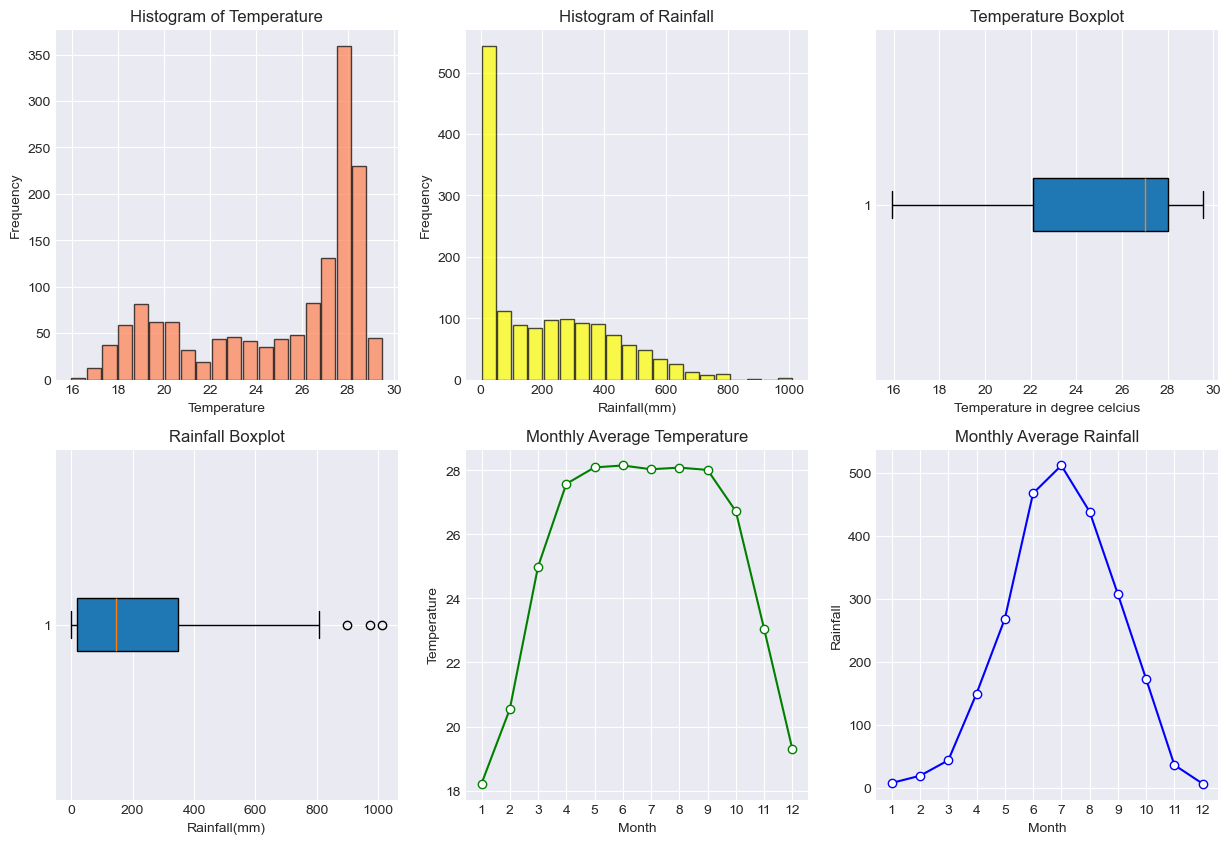

In [12]:
plt.figure(figsize=(15,10))
plt.style.use('seaborn-v0_8-darkgrid')
plt.subplot(2,3,1)
plt.hist(ff['tem'],bins=20,edgecolor='black',alpha=0.7,rwidth=0.9, color='coral')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(2,3,2)
plt.hist(ff['rain'],bins=20,edgecolor='black',alpha=0.7,rwidth=0.9, color='yellow')
plt.title('Histogram of Rainfall')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Frequency')

plt.subplot(2,3,3)
plt.boxplot(ff['tem'], vert=False, patch_artist=True) 
plt.title("Temperature Boxplot")
plt.xlabel('Temperature in degree celcius')

plt.subplot(2,3,4)
plt.boxplot(ff['rain'], vert=False, patch_artist=True) 
plt.title("Rainfall Boxplot")
plt.xlabel('Rainfall(mm)')

monthly_avg_temp= ff.groupby("Month")['tem'].mean()
plt.subplot(2,3,5)
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, label='Temperature', marker='o', color='green', markerfacecolor='white')
plt.title("Monthly Average Temperature")
plt.xlabel('Month')
plt.xticks(monthly_avg_temp.index)
plt.ylabel('Temperature')

montly_avg_rainfall= ff.groupby("Month")['rain'].mean()
plt.subplot(2,3,6)
plt.plot(montly_avg_rainfall.index, montly_avg_rainfall.values, label='Rainfall', marker='o', color='blue', markerfacecolor='white')
plt.title("Monthly Average Rainfall")
plt.xlabel('Month')
plt.xticks(montly_avg_rainfall.index)
plt.ylabel('Rainfall')


plt.show()

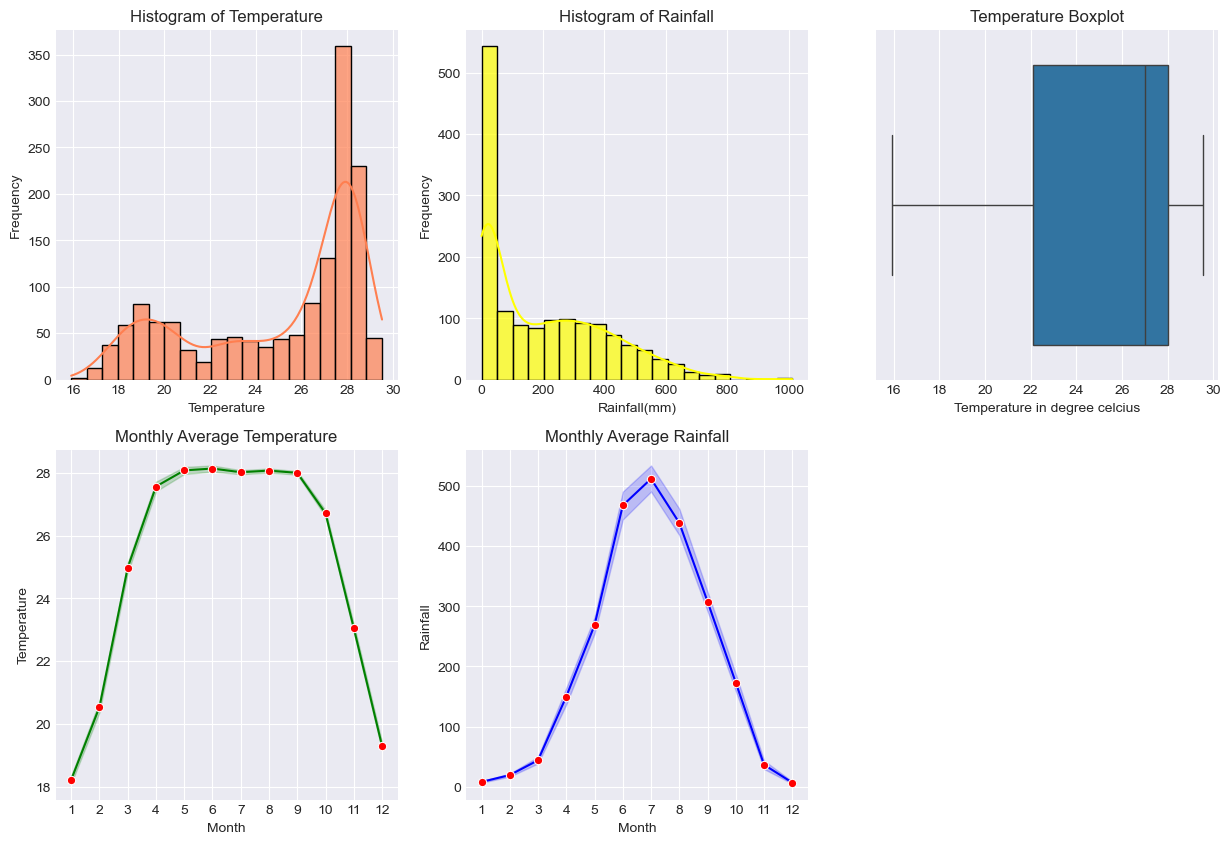

In [13]:
plt.figure(figsize=(15,10))
plt.style.use('seaborn-v0_8-darkgrid')

plt.subplot(2,3,1)
sns.histplot(data=ff, x='tem', color="coral", bins=20, edgecolor='black', alpha=0.7,kde=True)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.subplot(2,3,2)
sns.histplot(data=ff, x='rain', color="yellow", bins=20, edgecolor='black', alpha=0.7,kde=True)
plt.title('Histogram of Rainfall')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Frequency')

plt.subplot(2,3,3)
sns.boxplot(data=ff, x='tem', vert=False, patch_artist=True)
plt.title("Temperature Boxplot")
plt.xlabel('Temperature in degree celcius')

plt.subplot(2,3,4)
sns.lineplot(data=ff, x='Month', y='tem', marker='o', color='green', markerfacecolor='red', estimator=np.mean)
plt.title("Monthly Average Temperature")
plt.xticks(monthly_avg_temp.index)
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.subplot(2,3,5)
sns.lineplot(data=ff, x='Month', y='rain', marker='o', color='blue', markerfacecolor='red', estimator=np.mean)
plt.title("Monthly Average Rainfall")
plt.xlabel('Month')
plt.xticks(montly_avg_rainfall.index)
plt.ylabel('Rainfall')


plt.show()


Text(0, 0.5, 'Temperature')

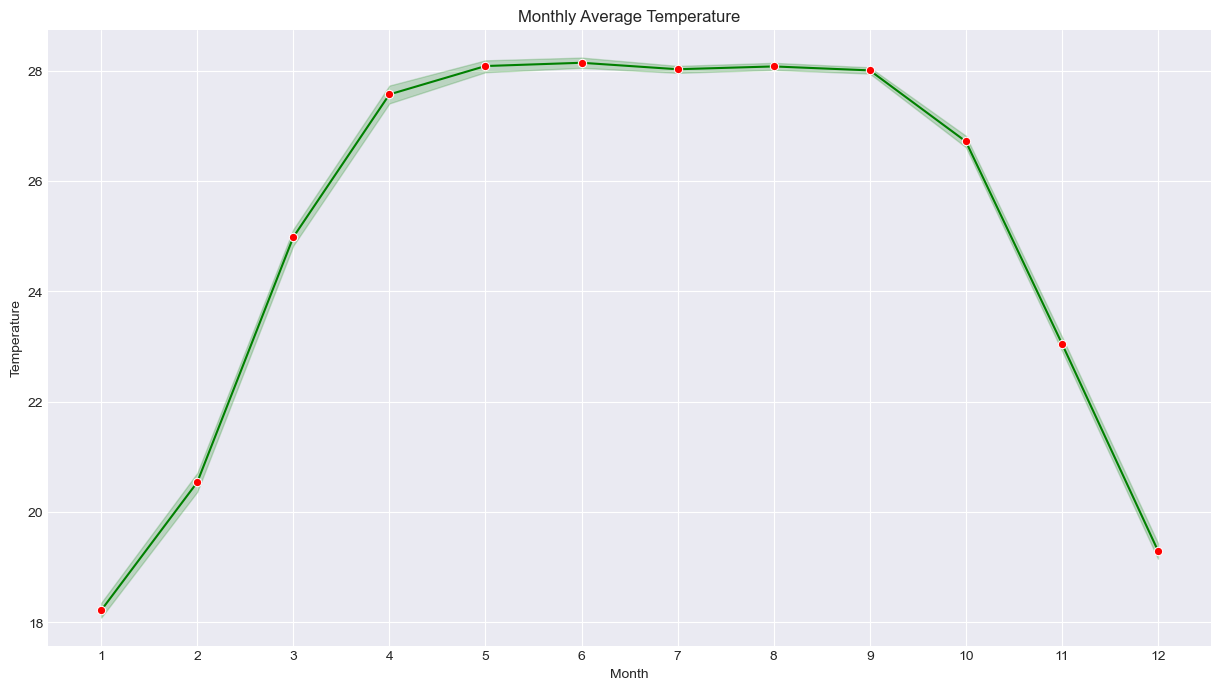

In [14]:
plt.figure(figsize=(15,8))
plt.style.use('seaborn-v0_8-darkgrid')

sns.lineplot(data=ff, x='Month', y='tem', marker='o', color='green', markerfacecolor='red', estimator=np.mean)
plt.title("Monthly Average Temperature")
plt.xticks(monthly_avg_temp.index)
plt.xlabel('Month')
plt.ylabel('Temperature')

In [35]:
import plotly.express as px

monthly_avg_temp= ff.groupby("Month")['tem'].mean()
fig = px.line(x=monthly_avg_temp.index, y=monthly_avg_temp.values, markers=True)
fig.update_layout(title="Monthly Average Temperature",xaxis_title="Month",yaxis_title="Temperature",template="plotly_dark")

fig.show()